Import Library

In [37]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from sklearn import preprocessing
from skimage.feature import graycomatrix, graycoprops

Directory

In [38]:
image_directory_training="../Dataset./preprocessed_roi_augmentation/5_label/dataset_training"
image_directory_testing="../Dataset./preprocessed_roi_augmentation/5_label/DataSet_Testing"

Inisialisasi Property Histogram

In [39]:
bins = 16

Ekstraksi Fitur HSV

In [40]:
def ef_hsv_training(image_directory_training):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_training = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # Konversi gambar ke ruang warna HSV
      hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

      h, s, v = cv2.split(hsv_image)  # Pisahkan channel H, S, dan V

      # Hitung histogram untuk channel H
      hist_h = cv2.calcHist([h], [0], None, [bins], [0, 256])
      hist_h = np.ravel(hist_h)  # Mengubah histogram H menjadi array 1 dimensi

      # Hitung histogram untuk channel S
      hist_s = cv2.calcHist([s], [0], None, [bins], [0, 256])
      hist_s = np.ravel(hist_s)  # Mengubah histogram S menjadi array 1 dimensi

      # Hitung histogram untuk channel V
      hist_v = cv2.calcHist([v], [0], None, [bins], [0, 256])
      hist_v = np.ravel(hist_v)  # Mengubah histogram V menjadi array 1 dimensi
      
      # menambahkan nilai HSV ke dalam list
      features_training.append([*hist_h, *hist_s, *hist_v, a])
      
  return features_training


def ef_hsv_testing(image_directory_testing):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_testing = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))
      
      # Konversi gambar ke ruang warna HSV
      hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

      h, s, v = cv2.split(hsv_image)  # Pisahkan channel H, S, dan V

      # Hitung histogram untuk channel H
      hist_h = cv2.calcHist([h], [0], None, [bins], [0, 256])
      hist_h = np.ravel(hist_h)  # Mengubah histogram H menjadi array 1 dimensi

      # Hitung histogram untuk channel S
      hist_s = cv2.calcHist([s], [0], None, [bins], [0, 256])
      hist_s = np.ravel(hist_s)  # Mengubah histogram S menjadi array 1 dimensi

      # Hitung histogram untuk channel V
      hist_v = cv2.calcHist([v], [0], None, [bins], [0, 256])
      hist_v = np.ravel(hist_v)  # Mengubah histogram V menjadi array 1 dimensi

      # menambahkan nilai HSV ke dalam list
      features_testing.append([*hist_h, *hist_s, *hist_v, a])
      
  return features_testing

Inisialisasi Data Training

In [41]:
#NORMALISASI DATA
extraction_feature = ef_hsv_training(image_directory_training)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
train_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    train_data.append(result_row)

In [42]:
# train_data = ef_hsv_training(image_directory_training)

In [43]:
# header tabel hsv
header = ['hist_h' + str(i+1) for i in range(bins)] + ['hist_s' + str(i+1) for i in range(bins)] + ['hist_v' + str(i+1) for i in range(bins)] + ['label']

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-----------+------------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+------------+------------+-----------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+---------+
|   hist_h1 |    hist_h2 |   hist_h3 |     hist_h4 |     hist_h5 |     hist_h6 |     hist_h7 |     hist_h8 |     hist_h9 |    hist_h10 |    hist_h11 |    hist_h12 |   hist_h13 |   hist_h14 |   hist_h15 |   hist_h16 |   hist_s1 |    hist_s2 |    hist_s3 |     hist_s4 |     hist_s5 |     hist_s6 |     hist_s7 |     hist_s8 |     hist_s9

Inisialisasi Data Testing

In [44]:
#NORMALISASI DATA
extraction_feature = ef_hsv_testing(image_directory_testing)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
test_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    test_data.append(result_row)

In [45]:
# test_data = ef_hsv_testing(image_directory_testing)

In [46]:
# header tabel hsv
header = ['hist_h' + str(i+1) for i in range(bins)] + ['hist_s' + str(i+1) for i in range(bins)] + ['hist_v' + str(i+1) for i in range(bins)] + ['label']

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+-----------+------------+-----------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+------------+------------+-----------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+-----------+-----------+------------+------------+------------+-------------+-------------+-------------+-------------+------------+------------+---------+
|   hist_h1 |    hist_h2 |   hist_h3 |    hist_h4 |     hist_h5 |     hist_h6 |     hist_h7 |     hist_h8 |     hist_h9 |    hist_h10 |    hist_h11 |    hist_h12 |   hist_h13 |   hist_h14 |   hist_h15 |   hist_h16 |   hist_s1 |    hist_s2 |    hist_s3 |     hist_s4 |     hist_s5 |     hist_s6 |     hist_s7 |     hist_s8 |     hist_s9 |   hi

Klasifikasi Model Naive Bayes

In [47]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [48]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [49]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [50]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 1, 1, 1, 1, 3, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

In [51]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel hsv
header = ['hist_h' + str(i+1) for i in range(bins)] + ['hist_s' + str(i+1) for i in range(bins)] + ['hist_v' + str(i+1) for i in range(bins)] + ['label'] +['Predict']

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))

+-----------+------------+-----------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+------------+------------+-----------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+-----------+-----------+------------+------------+------------+-------------+-------------+-------------+-------------+------------+------------+---------+-----------+
|   hist_h1 |    hist_h2 |   hist_h3 |    hist_h4 |     hist_h5 |     hist_h6 |     hist_h7 |     hist_h8 |     hist_h9 |    hist_h10 |    hist_h11 |    hist_h12 |   hist_h13 |   hist_h14 |   hist_h15 |   hist_h16 |   hist_s1 |    hist_s2 |    hist_s3 |     hist_s4 |     hist_s5 |     hist_s6 |     hist_s7 |     hist_s8 |     hi

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        32
           2       0.78      1.00      0.88        32
           3       1.00      0.78      0.88        32
           4       1.00      0.97      0.98        32
           5       1.00      0.75      0.86        32

    accuracy                           0.90       160
   macro avg       0.92      0.90      0.90       160
weighted avg       0.92      0.90      0.90       160



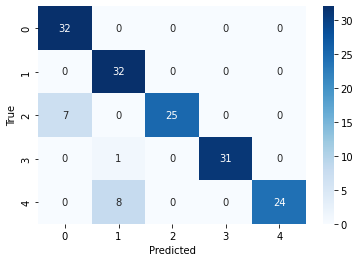

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9
